In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Weekend Return']=df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day', 'VVM10'])
    df = df.astype(float)

    return df
def tree_model():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Weekend Return', 'Time_Segment', 'Season', 'VVM10', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (85% train, 15% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = DecisionTreeClassifier(max_depth=10, min_samples_leaf= 1, min_samples_split= 5)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    
    feature_importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=X.columns, color='skyblue')
    
    y_probs = model.predict_proba(X_test)[:, 1]

    # Guardar las probabilidades predichas en un DataFrame de pandas
    predictions_df = pd.DataFrame({'Situation 1': y_probs})
    predictions_df.to_csv('predictions.csv', index=False)
    
    
    
def main():
    tree_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Accuracy: 0.8188736681887366
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       326
         1.0       0.79      0.87      0.83       331

    accuracy                           0.82       657
   macro avg       0.82      0.82      0.82       657
weighted avg       0.82      0.82      0.82       657

Confusion Matrix:
[[250  76]
 [ 43 288]]


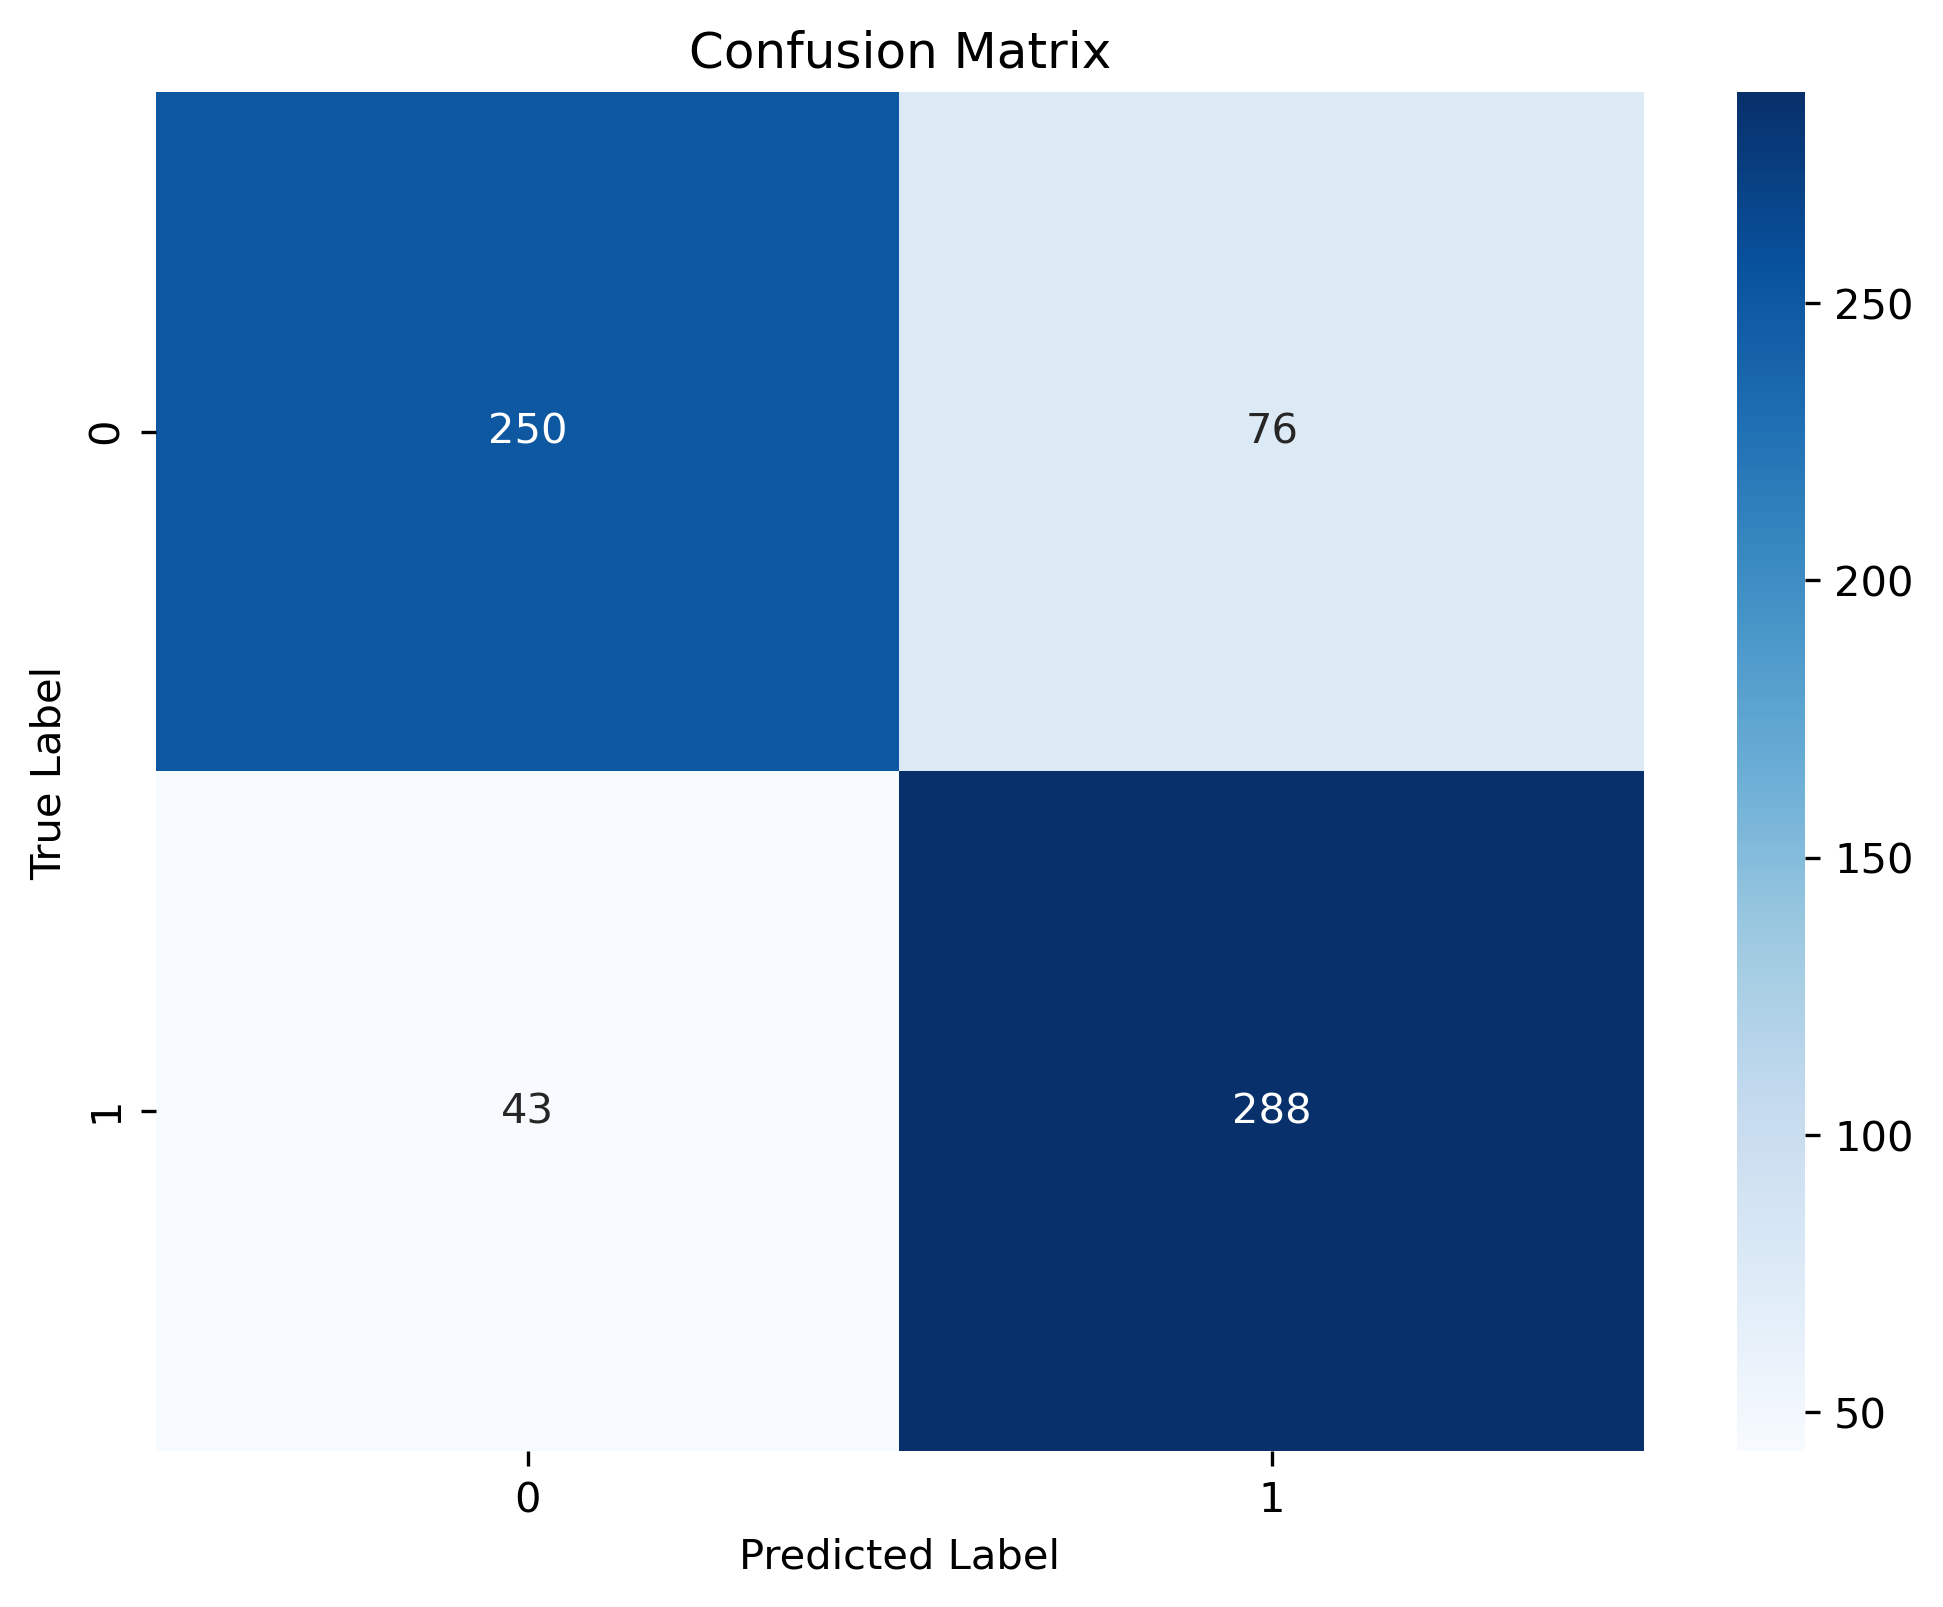

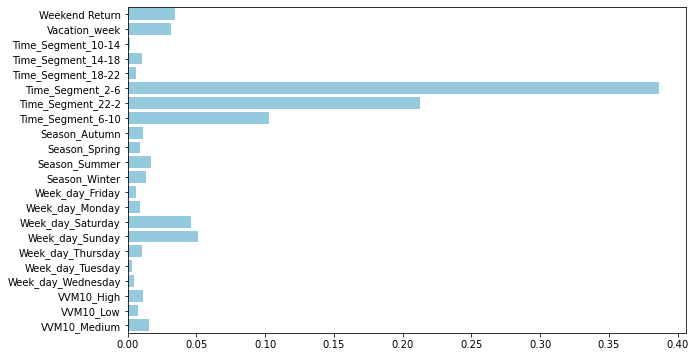

In [3]:
main()

In [4]:
df = pd.read_csv('predictions.csv')

In [5]:
df

,Situation 1
0,0.893130
1,0.906977
2,0.043478
3,0.000000
4,0.800000
...,...
652,0.000000
653,0.458333
654,0.458333
655,0.500000


In [6]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season',  'PPT', 'TM'])
    df = df.astype(float)

    return df

def get_feature_importance_percentage(model):
    feature_importance = model.feature_importances_
    total_importance = feature_importance.sum()
    feature_importance_percentage = (feature_importance / total_importance) * 100
    return feature_importance_percentage

def light_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Weekend Return', 'Time_Segment', 'Season', 'PPT', 'TM', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=31)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(model)
    plt.show()
    
    predictions_df=pd.read_csv('predictions.csv')
    y_probs = model.predict_proba(X_test)[:, 1]

    # Guardar las probabilidades predichas en un DataFrame de pandas
    predictions_df['Situation 3']= y_probs
    predictions_df.to_csv('predictions.csv', index=False)
    
def main():
    light_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

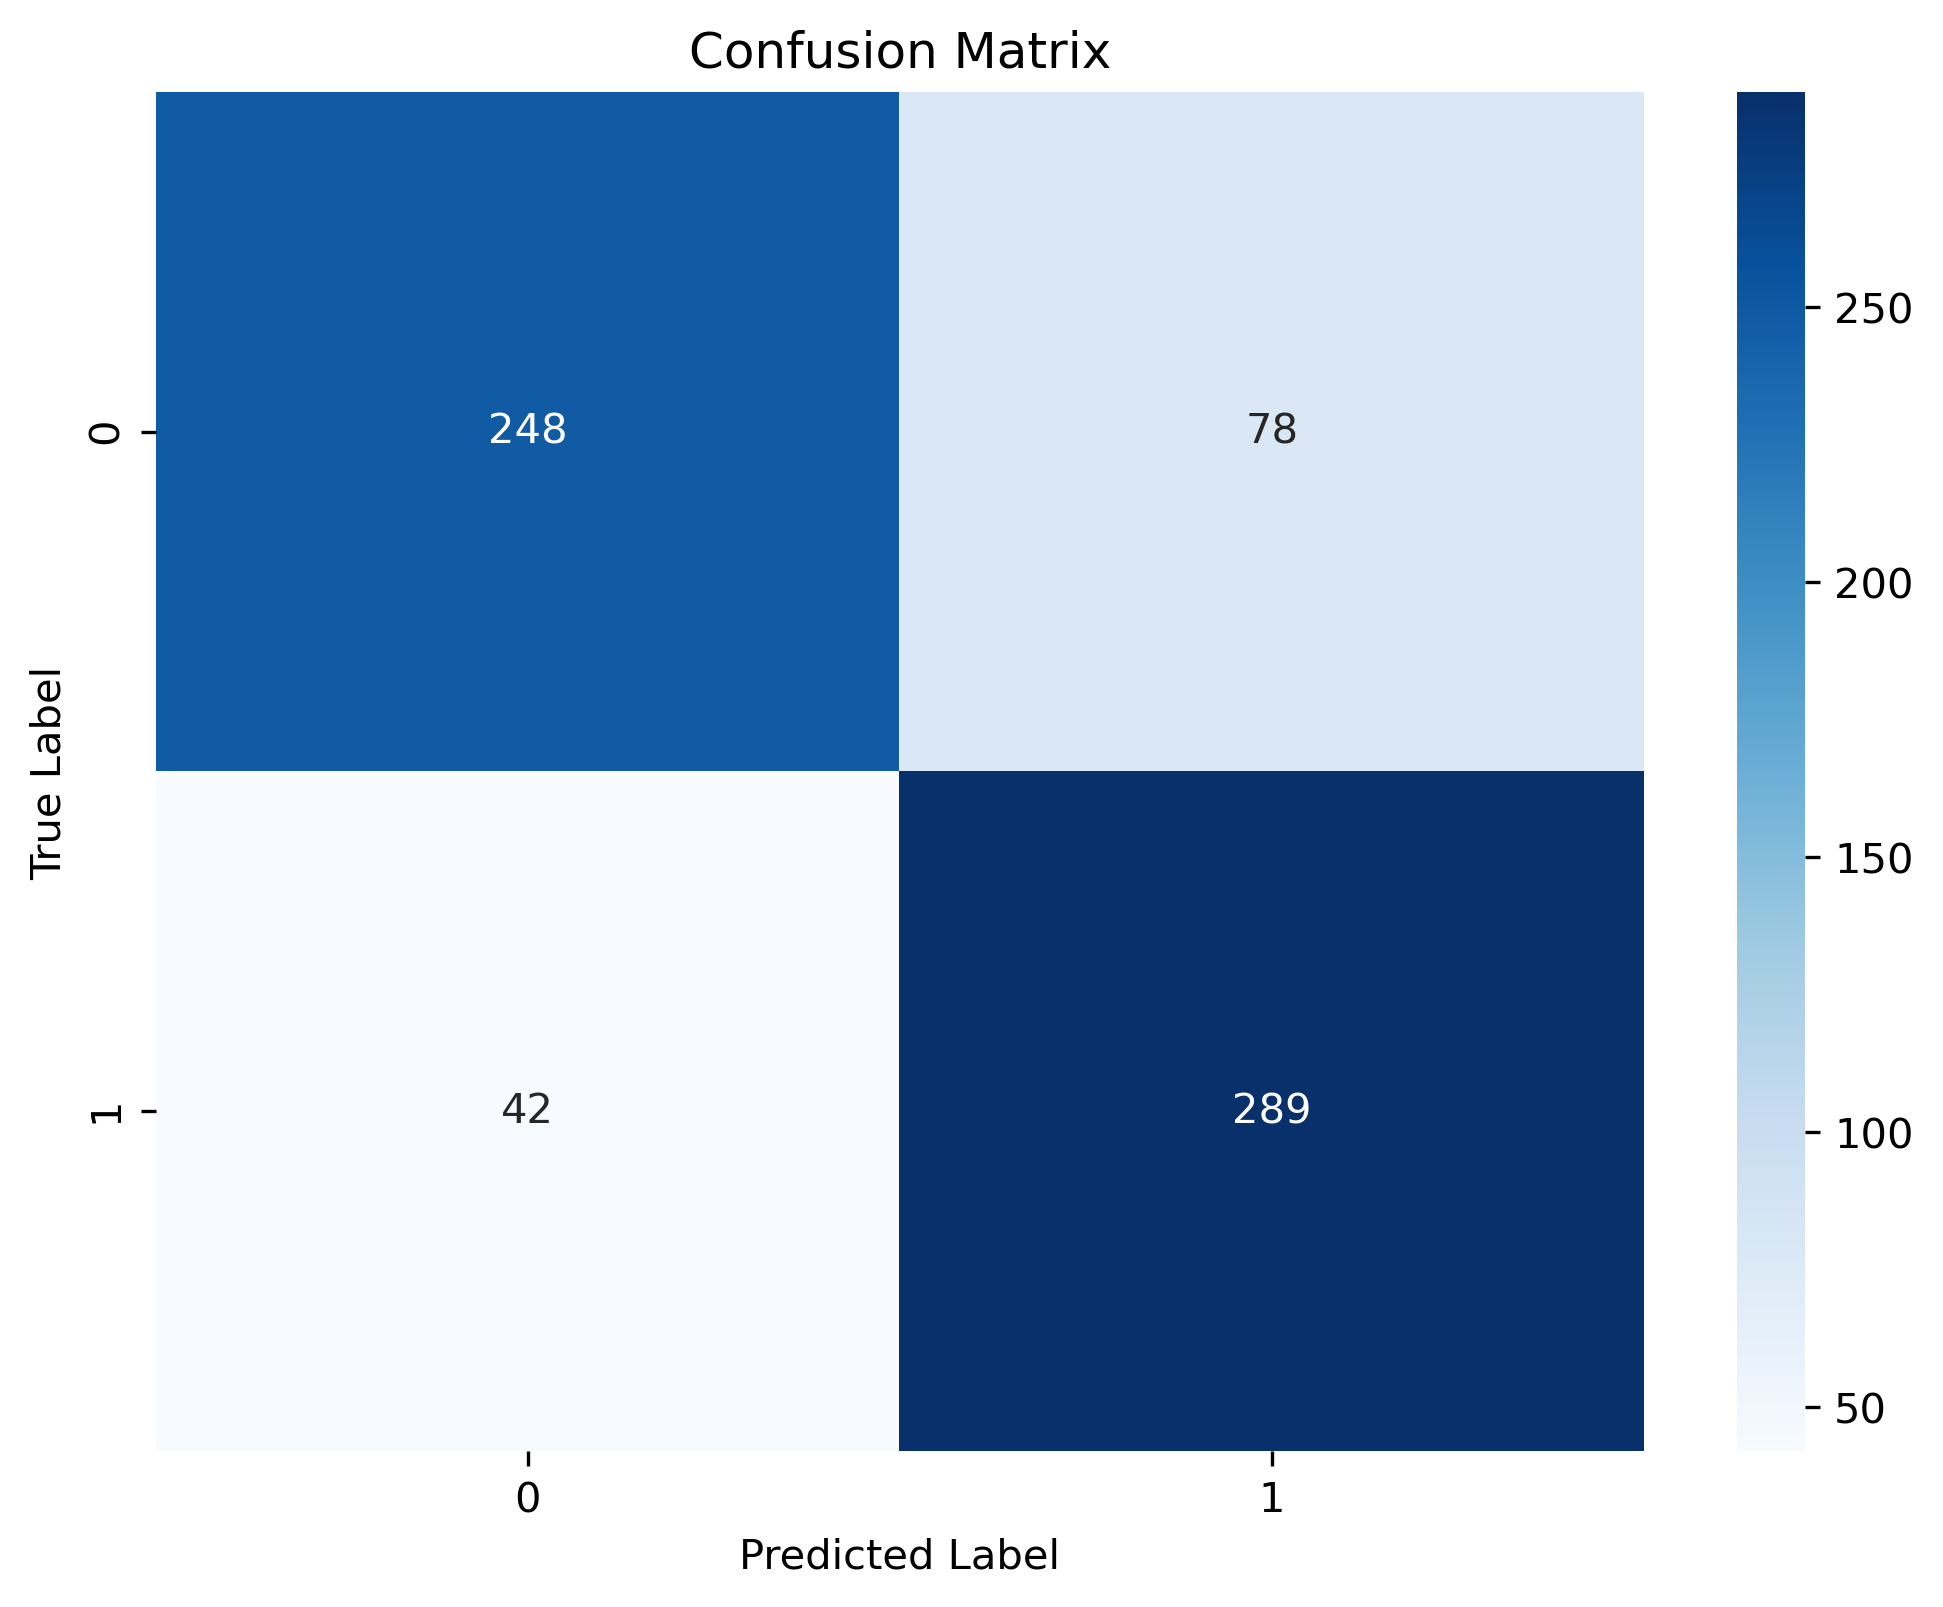

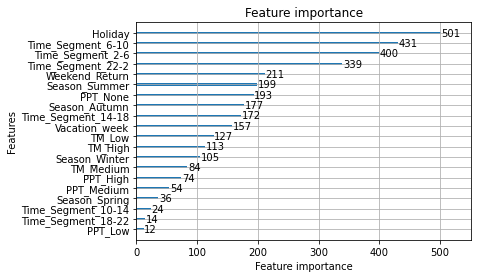

In [7]:
main()

In [8]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day'])
    df = df.astype(float)

    return df

def get_feature_importance_percentage(model):
    feature_importance = model.feature_importances_
    total_importance = feature_importance.sum()
    feature_importance_percentage = (feature_importance / total_importance) * 100
    return feature_importance_percentage

def light_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=31)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(model)
    plt.show()
  
    # Get feature importance in percentage
    feature_importance_percentage = get_feature_importance_percentage(model)
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_percentage, y=X.columns)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Features')
    plt.show()
    
    predictions_df=pd.read_csv('predictions.csv')
    y_probs = model.predict_proba(X_test)[:, 1]

    # Guardar las probabilidades predichas en un DataFrame de pandas
    predictions_df['Situation 2']= y_probs
    predictions_df.to_csv('predictions.csv', index=False)
    
def main():
    light_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

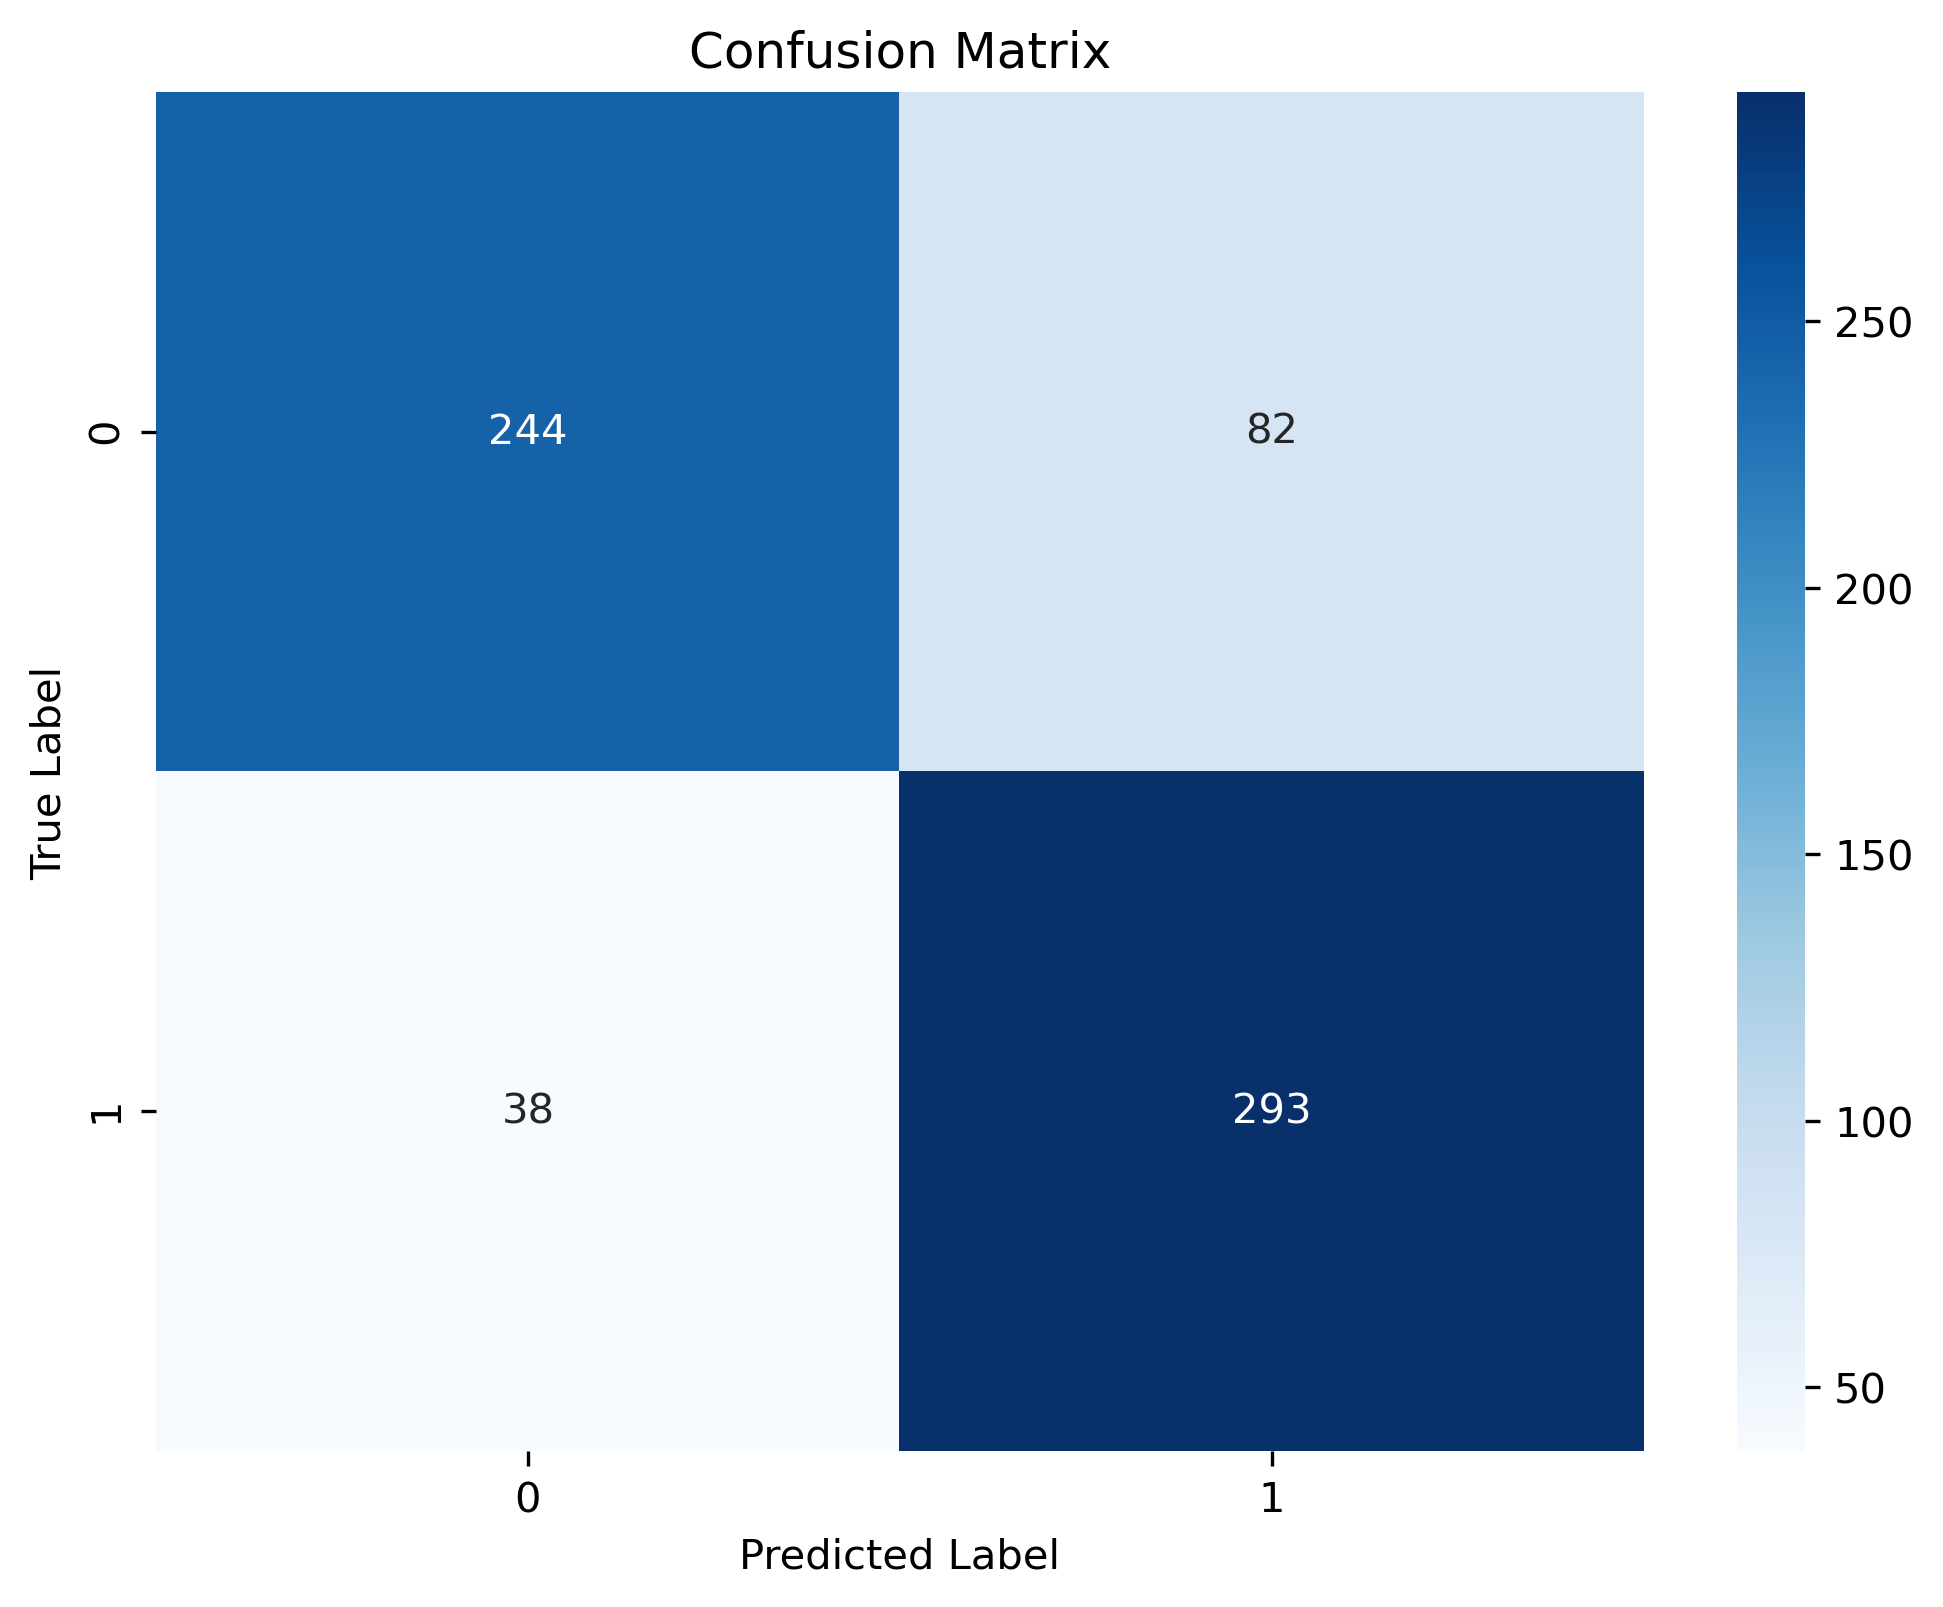

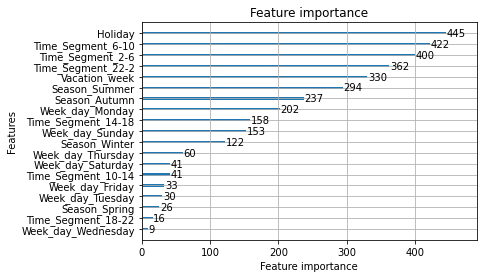

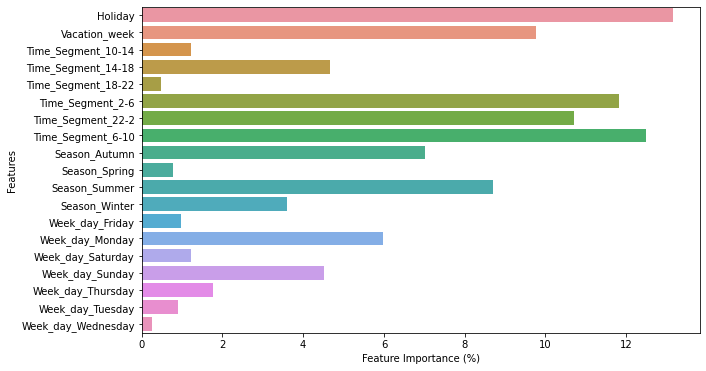

In [9]:
main()

In [10]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season',  'VVM10', 'TM', 'Week_day'])
    df = df.astype(float)

    return df

def get_feature_importance_percentage(model):
    feature_importance = model.feature_importances_
    total_importance = feature_importance.sum()
    feature_importance_percentage = (feature_importance / total_importance) * 100
    return feature_importance_percentage

def light_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday','Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=31)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    lgb.plot_importance(model)
    plt.show()
    
    
    # Get feature importance in percentage
    feature_importance_percentage = get_feature_importance_percentage(model)
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_percentage, y=X.columns)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Features')
    plt.show()
    
    predictions_df=pd.read_csv('predictions.csv')
    y_probs = model.predict_proba(X_test)[:, 1]

    # Guardar las probabilidades predichas en un DataFrame de pandas
    predictions_df['Situation 5']= y_probs
    predictions_df.to_csv('predictions.csv', index=False)
    
def main():
    light_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


[LightGBM] [Info] Number of positive: 1765, number of negative: 1958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474080 -> initscore=-0.103773
[LightGBM] [Info] Start training from score -0.103773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

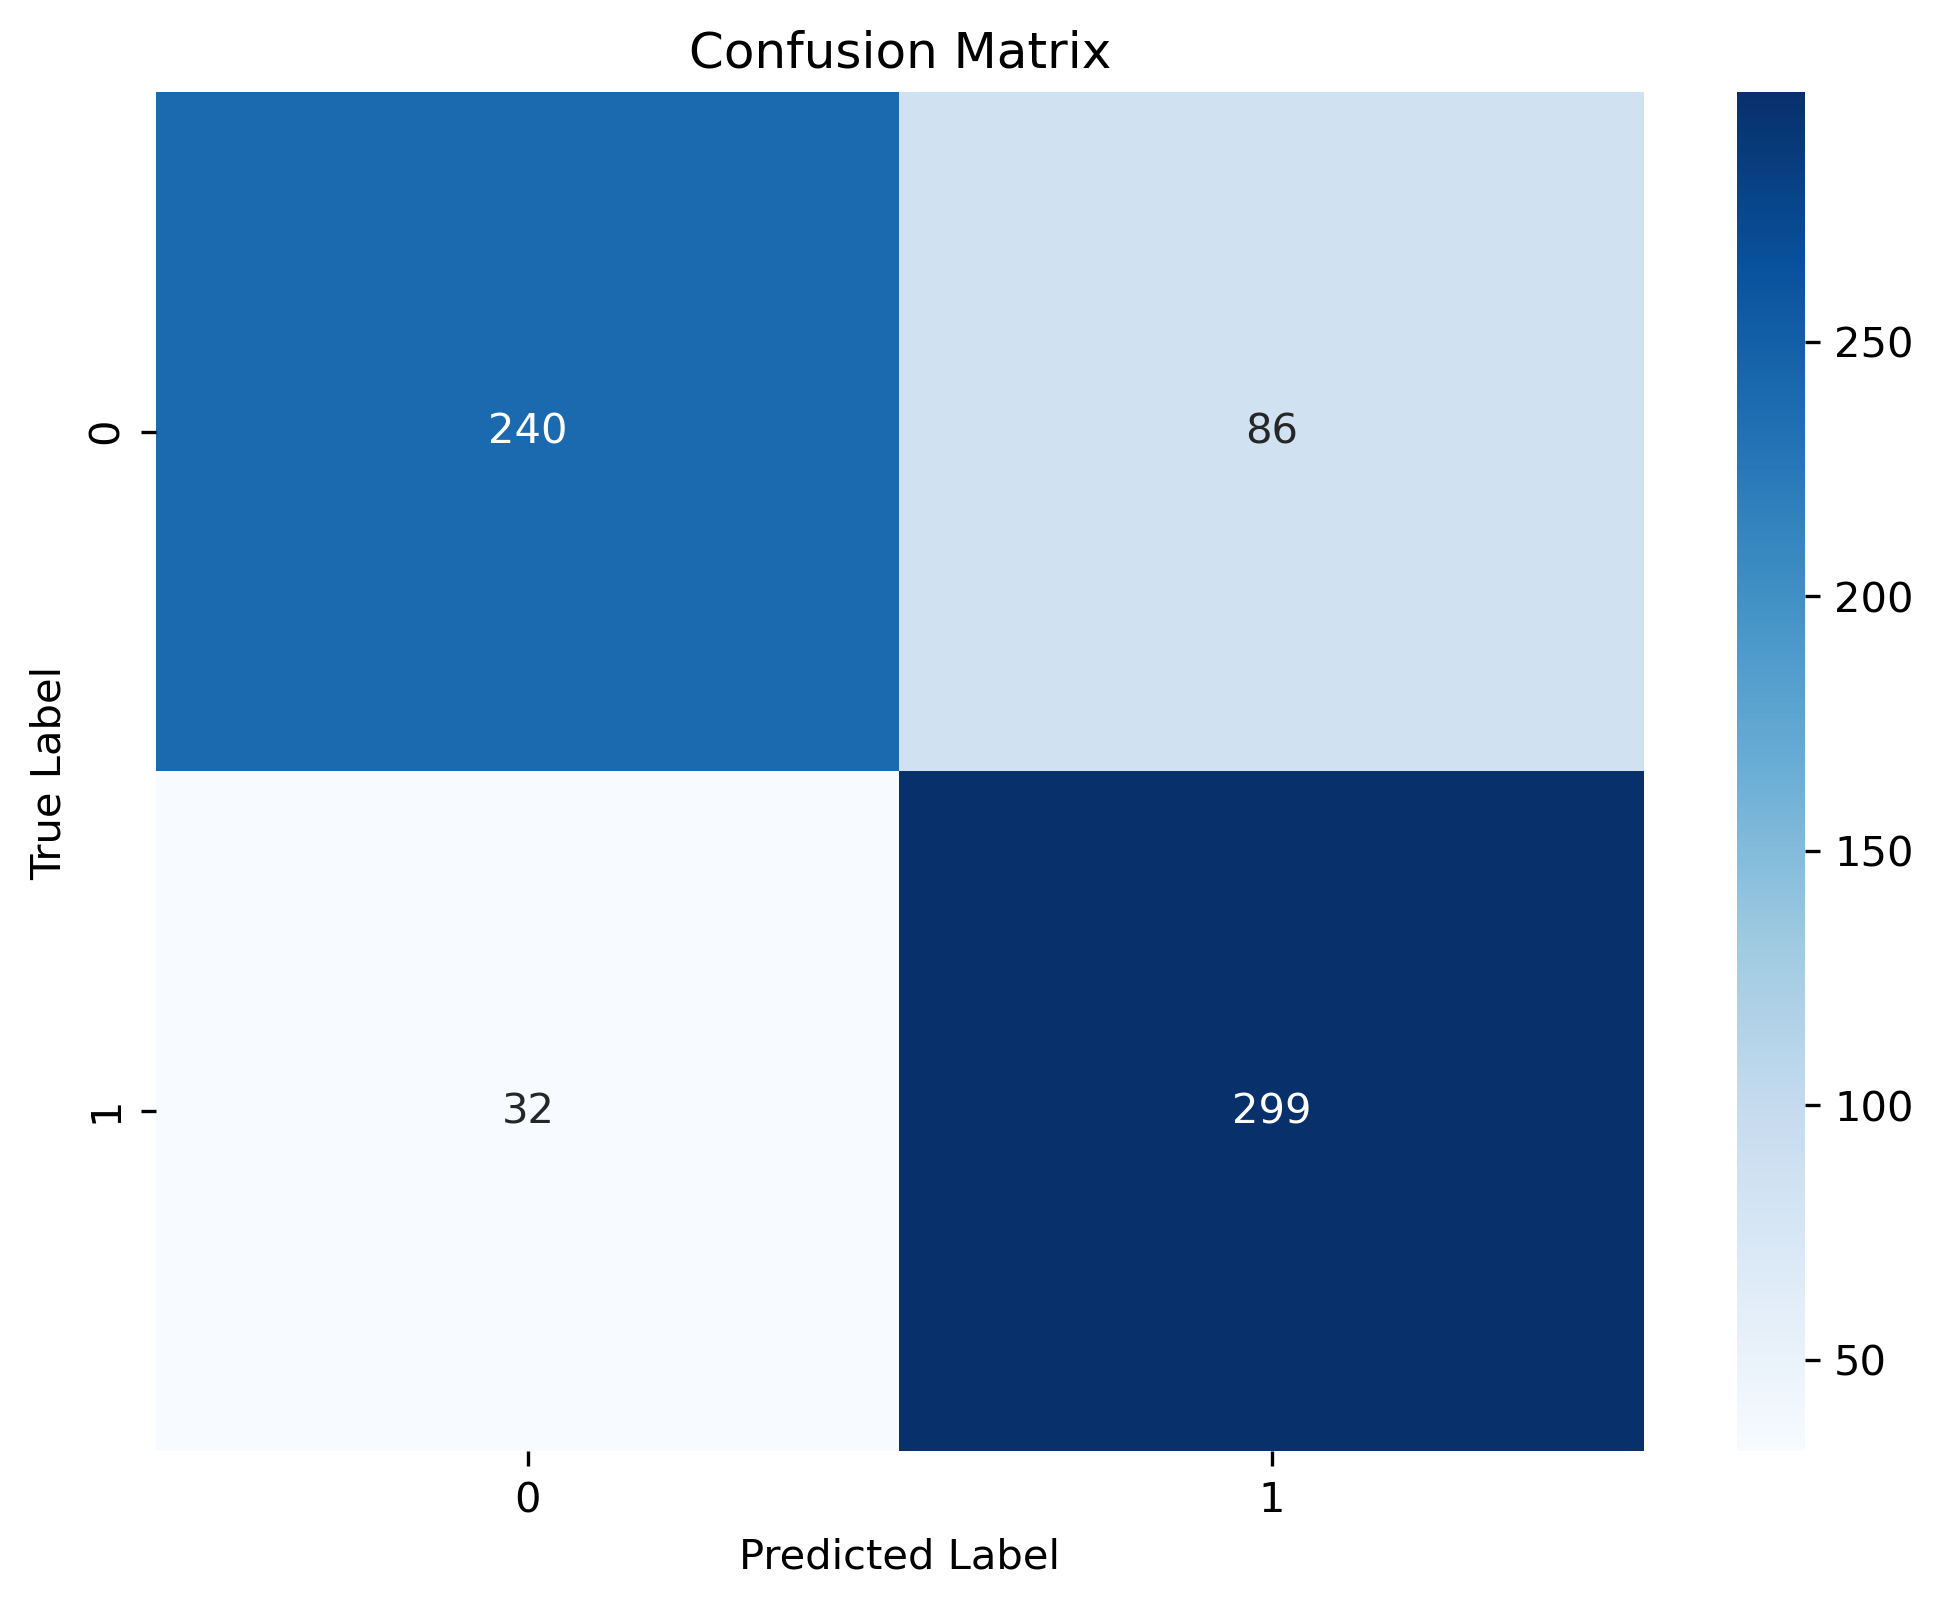

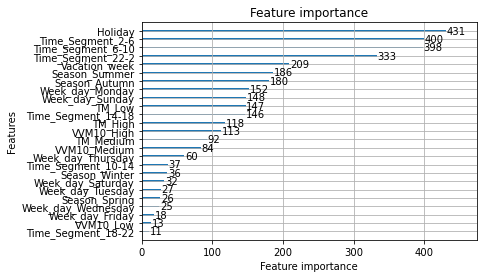

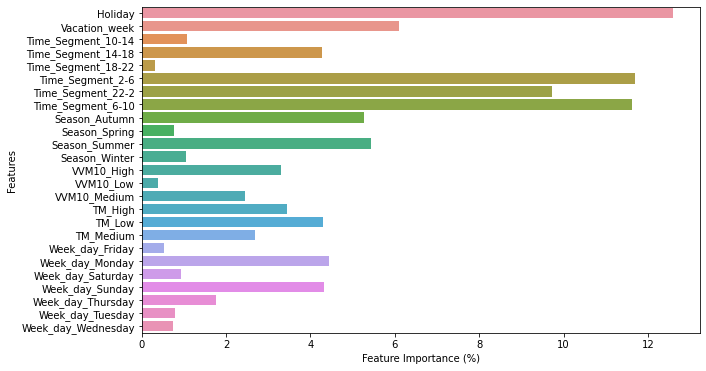

In [11]:
main()

In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday']=df['Holiday'].map(mapeo)
    df['Weekend Return']=df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day', 'VVM10',  'TM'])
    df = df.astype(float)

    return df

def xgboost_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Weekend Return', 'Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=400, subsample=0.9)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Assuming your model is named 'model' and is already trained
    xgb.plot_importance(model)
    plt.title("XGBoost Feature Importance")
    plt.show()
    
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    
    predictions_df=pd.read_csv('predictions.csv')
    y_probs = model.predict_proba(X_test)[:, 1]

    # Guardar las probabilidades predichas en un DataFrame de pandas
    predictions_df['Situation 4']= y_probs
    predictions_df.to_csv('predictions.csv', index=False)
    

def main():
    xgboost_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Accuracy: 0.8203957382039574


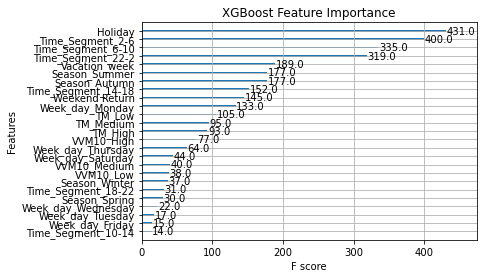

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80       326
         1.0       0.78      0.90      0.83       331

    accuracy                           0.82       657
   macro avg       0.83      0.82      0.82       657
weighted avg       0.83      0.82      0.82       657

Confusion Matrix:
[[241  85]
 [ 33 298]]


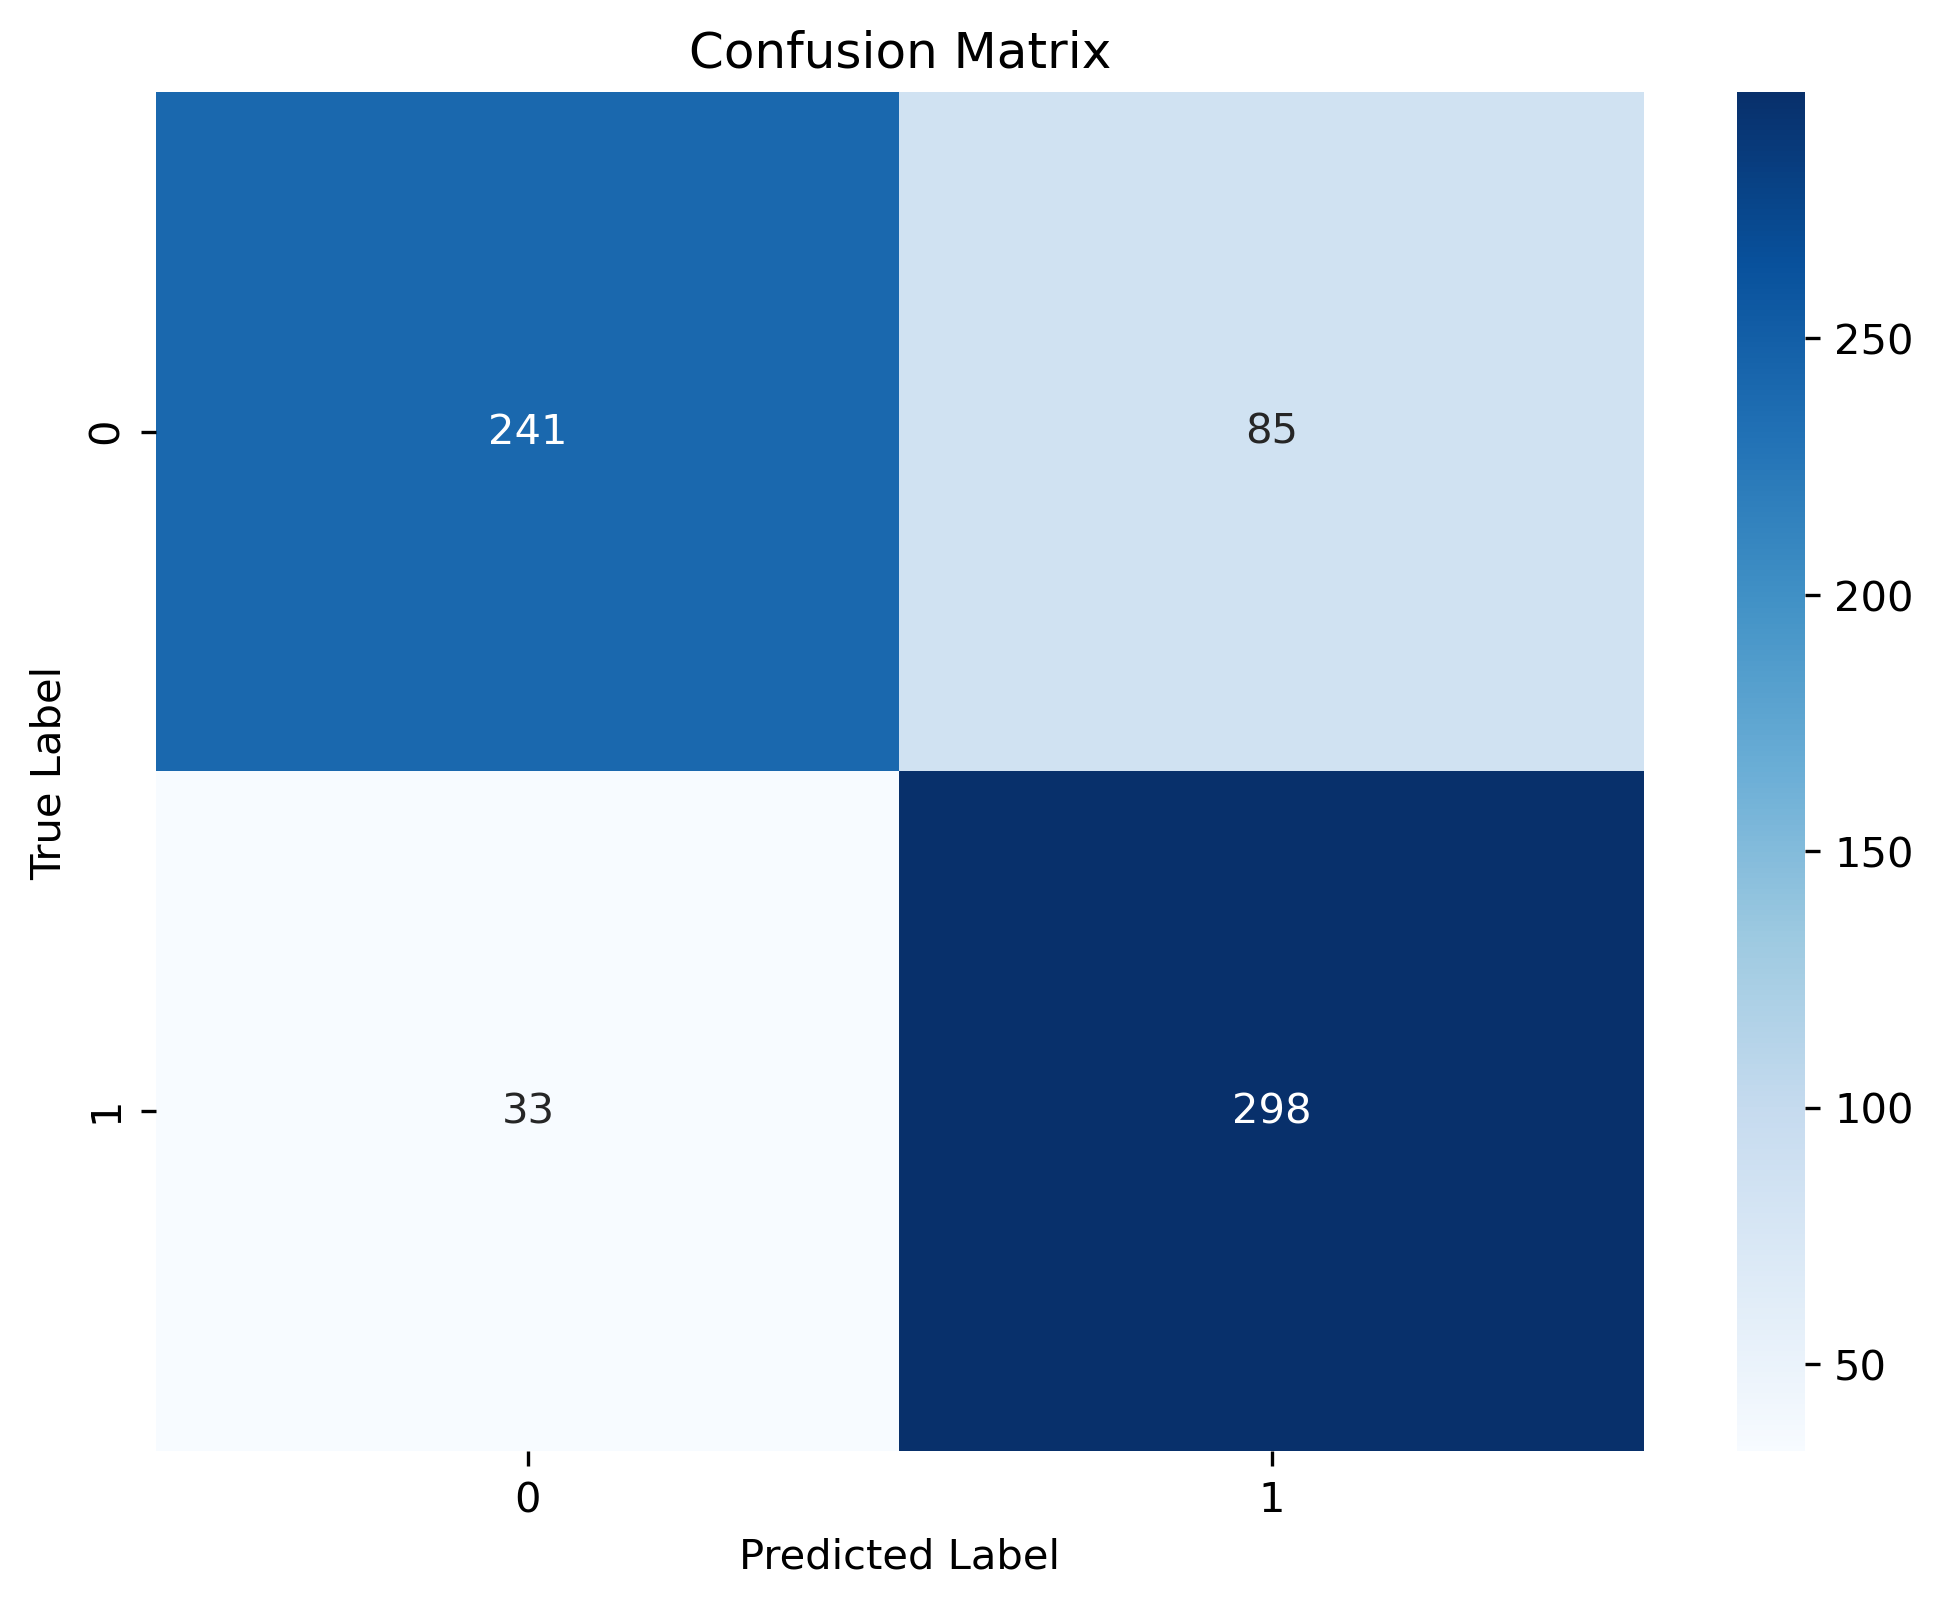

In [13]:
main()

In [14]:
df = pd.read_csv('predictions.csv')
df

,Situation 1,Situation 3,Situation 2,Situation 5,Situation 4
0,0.893130,0.848904,0.887909,0.880724,0.885488
1,0.906977,0.815842,0.803000,0.788267,0.799035
2,0.043478,0.215429,0.179744,0.195075,0.201429
3,0.000000,0.008656,0.008656,0.008656,0.010330
4,0.800000,0.648979,0.672293,0.639264,0.618936
...,...,...,...,...,...
652,0.000000,0.161247,0.173571,0.214523,0.181166
653,0.458333,0.558474,0.567370,0.589145,0.586171
654,0.458333,0.564611,0.564653,0.572007,0.567776
655,0.500000,0.568889,0.577458,0.597766,0.598411


In [22]:
df3=pd.read_csv('final_dataset.csv')
df3[3723:]

,Day,Time_Segment,Accidents,Week_day,TM,PPT,VVM10,Holiday,Vacation_week,Weekend Return,Season,Exceeds Threshold
3723,2022-09-13,14-18,5,Tuesday,High,Low,Medium,No,0,No,Autumn,1
3724,2022-09-13,18-22,3,Tuesday,High,Low,Medium,No,0,No,Autumn,0
3725,2022-09-13,22-2,0,Tuesday,High,Low,Medium,No,0,No,Autumn,0
3726,2022-09-14,2-6,0,Wednesday,High,Low,High,No,0,No,Autumn,0
3727,2022-09-14,6-10,3,Wednesday,High,Low,High,No,0,No,Autumn,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2022-12-31,6-10,1,Saturday,Medium,None,Medium,Yes,1,No,Winter,0
4376,2022-12-31,10-14,6,Saturday,Medium,None,Medium,Yes,1,No,Winter,1
4377,2022-12-31,14-18,4,Saturday,Medium,None,Medium,Yes,1,No,Winter,1
4378,2022-12-31,18-22,5,Saturday,Medium,None,Medium,Yes,1,No,Winter,1


In [23]:
df3=pd.read_csv('final_dataset.csv')
df3=df3['Exceeds Threshold'][3723:]
df3


3723    1
3724    0
3725    0
3726    0
3727    0
       ..
4375    0
4376    1
4377    1
4378    1
4379    0
Name: Exceeds Threshold, Length: 657, dtype: int64

In [25]:
df['Exceeds Threshold'] = df3.values

# Guarda el DataFrame resultante con la nueva columna
df.to_csv('tu_dataframe_actualizado.csv', index=False)
df

,Situation 1,Situation 3,Situation 2,Situation 5,Situation 4,Exceeds Threshold
0,0.893130,0.848904,0.887909,0.880724,0.885488,1
1,0.906977,0.815842,0.803000,0.788267,0.799035,0
2,0.043478,0.215429,0.179744,0.195075,0.201429,0
3,0.000000,0.008656,0.008656,0.008656,0.010330,0
4,0.800000,0.648979,0.672293,0.639264,0.618936,0
...,...,...,...,...,...,...
652,0.000000,0.161247,0.173571,0.214523,0.181166,0
653,0.458333,0.558474,0.567370,0.589145,0.586171,1
654,0.458333,0.564611,0.564653,0.572007,0.567776,1
655,0.500000,0.568889,0.577458,0.597766,0.598411,1


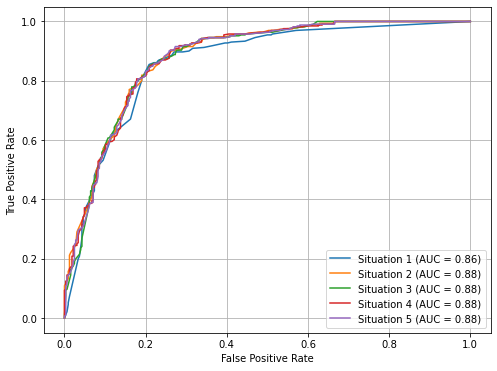

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



# Extraer las probabilidades de predicción y la variable objetivo
p1 = df['Situation 1']
p2 = df['Situation 2']
p3 = df['Situation 3']
p4 = df['Situation 4']
p5 = df['Situation 5']
y_test = df['Exceeds Threshold']

# Inicializar una figura y un eje
plt.figure(figsize=(8, 6))

# Iterar sobre cada modelo para calcular la curva ROC y el AUC
for i, probabilities in enumerate([p1, p2, p3, p4, p5], start=1):
    # Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR)
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    
    # Calcular el área bajo la curva (AUC)
    auc = roc_auc_score(y_test, probabilities)
    
    # Dibujar la curva ROC para el modelo actual
    plt.plot(fpr, tpr, label=f'Situation {i} (AUC = {auc:.2f})')

# Configurar las etiquetas y el título del gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.grid(True)
plt.show()

